In [23]:
!pip install ucimlrepo

import pandas as pd

In [49]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 
  
# data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 
  
# metadata 
print(regensburg_pediatric_appendicitis.metadata) 
  
# variable information 
print(regensburg_pediatric_appendicitis.variables) 

{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [50]:
X.sample(n=500, random_state=42)
y.sample (n=500, random_state=42)

,Management,Severity,Diagnosis
596,primary surgical,complicated,appendicitis
588,secondary surgical,uncomplicated,appendicitis
208,conservative,uncomplicated,appendicitis
291,conservative,uncomplicated,no appendicitis
174,conservative,uncomplicated,no appendicitis
...,...,...,...
552,secondary surgical,uncomplicated,appendicitis
316,conservative,uncomplicated,appendicitis
740,primary surgical,complicated,appendicitis
480,conservative,uncomplicated,no appendicitis


In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [52]:
target_col = "Diagnosis"
y = regensburg_pediatric_appendicitis.data.targets[target_col]

features = ['Age',
    'Sex',
    'WBC_Count',
    'CRP',
    'Body_Temperature',
    'Lower_Right_Abd_Pain',
    'Migratory_Pain',
    'Appendix_on_US']

X = X[features]

In [ ]:
df = pd.concat([X, y], axis=1).dropna()

# Split into features and target again
X_clean = df[features]
y_clean = df['Diagnosis']

X_clean['Sex'] = X_clean['Sex'].map({'male': 1, 'female': 0})

# Check for object (non-numeric) columns
non_numeric = X_clean.select_dtypes(include='object').columns.tolist()
print("Non-numeric columns:", non_numeric)

# Convert all categorical (non-numeric) columns using one-hot encoding
X_clean = pd.get_dummies(X_clean, columns=non_numeric, drop_first=True)

In [59]:
X_clean.head()

,Age,Sex,WBC_Count,CRP,Body_Temperature,Lower_Right_Abd_Pain_yes,Migratory_Pain_yes,Appendix_on_US_yes
0,12.68,0,7.7,0.0,37.0,True,False,True
1,14.10,1,8.1,3.0,36.9,True,True,False
2,14.14,0,13.2,3.0,36.6,True,False,False
3,16.37,0,11.4,0.0,36.0,True,True,False
4,11.08,0,8.1,0.0,36.9,True,False,True


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8209606986899564
                 precision    recall  f1-score   support

   appendicitis       0.85      0.83      0.84       131
no appendicitis       0.78      0.81      0.79        98

       accuracy                           0.82       229
      macro avg       0.82      0.82      0.82       229
   weighted avg       0.82      0.82      0.82       229



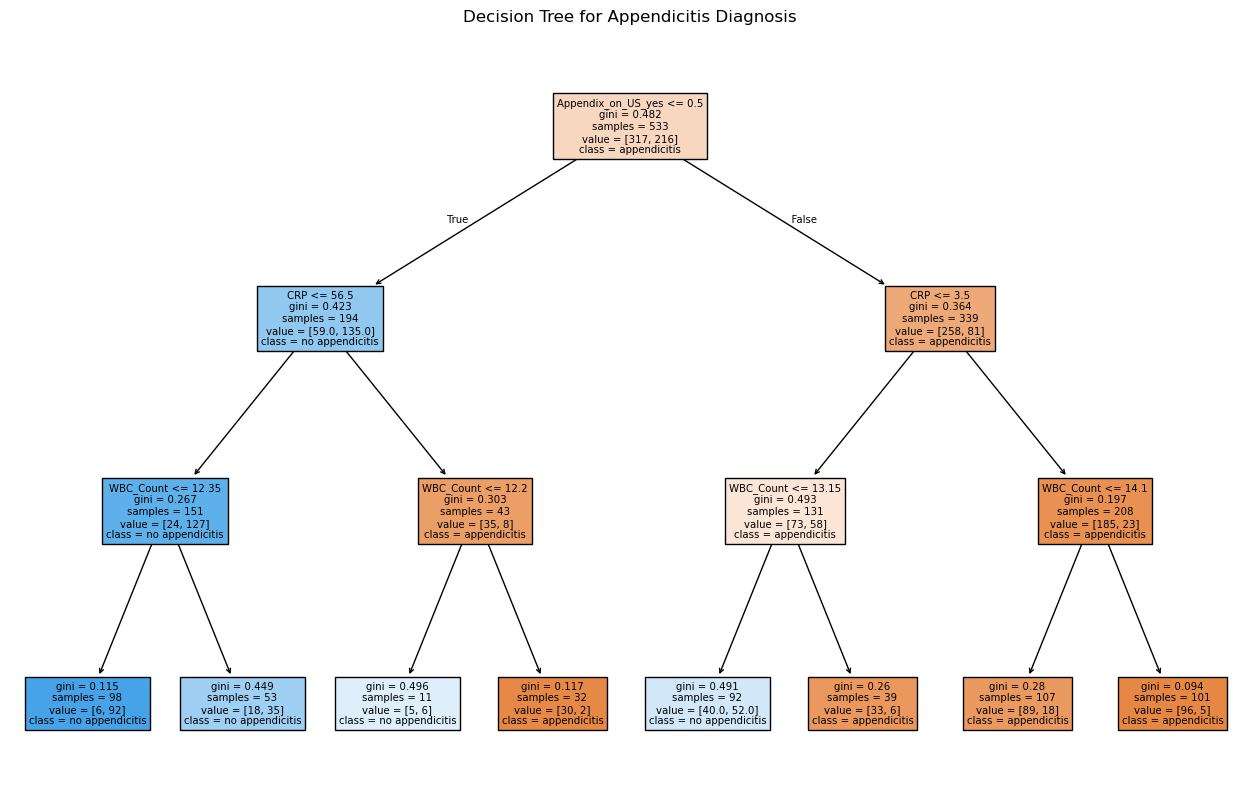

In [68]:
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X_clean.columns, class_names=clf.classes_.astype(str), filled=True)
plt.title("Decision Tree for Appendicitis Diagnosis")
plt.show()